In [18]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#load the dataset
data = pd.read_excel("data4.xlsx")
data.head()

,R,AD,AD2,E,T
0,246041.842063,437.086107,191044.264900,70,2
1,42389.569761,955.642876,913253.306008,54,5
2,183025.382117,758.794548,575769.165513,32,9
3,230736.604254,638.792636,408056.031523,82,7
4,182616.550024,240.416776,57800.226374,69,8


In the above chart where AD2 column is that is just AD squared as we have increased the power of that column for this hybrid model (basically its a kind of feature manipulation)

In [3]:
#Define the dependent and independent variable
X =data[['AD','AD2','E','T']] #independent variables
Y= data['R'] #dependent variable

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size =0.2, random_state=42)
print("Data split completed")

Data split completed


In [5]:
#Initializing the model
LR_model = LinearRegression()

#training the model
LR_model.fit(X_train, y_train)
print("Training Status of the model: Completed")

Training Status of the model: Completed


In [6]:
#predicting
y_pred = LR_model.predict(X_test)
print("Prediction Completed")

Prediction Completed


In [7]:
#Evlaulating the model
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)

print("r2 score:", r2)

Mean squared error: 6.789068333916723e-21
r2 score: 1.0


In [9]:
#getting intercept and slope
print("\nModel Coefficients:")

for i , col in enumerate(X.columns):
    print(f"{col}:{LR_model.coef_[i]}")

print("Intercept(a):", LR_model.intercept_)




Model Coefficients:
AD:1000.0000000000008
AD2:-1.0000000000000009
E:1.0067003381133451e-13
T:8.959755753494312e-13
Intercept(a): -1.1641532182693481e-10


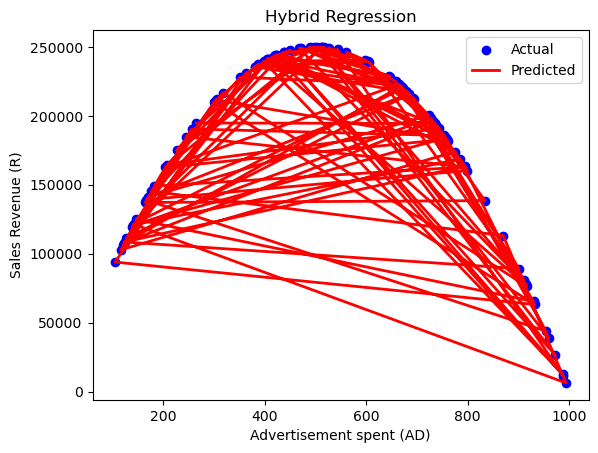

In [16]:
#visualisation

# Make sure X_test is 1D for plotting
if isinstance(X_test, pd.DataFrame):
    # If it's a DataFrame with one column, convert to 1D array
    X_test_plot = X_test.iloc[:, 0].values  # Get first column as numpy array
elif hasattr(X_test, 'shape') and len(X_test.shape) > 1:
    # If it's a numpy array with multiple columns
    X_test_plot = X_test.ravel()
else:
    X_test_plot = X_test

# Now plot with matching dimensions
plt.scatter(X_test_plot, y_test, color='blue', label='Actual')
plt.plot(X_test_plot, y_pred, color='red', linewidth=2, label='Predicted')

plt.title("Hybrid Regression")
plt.xlabel('Advertisement spent (AD)')
plt.ylabel('Sales Revenue (R)')
plt.legend()

plt.show()

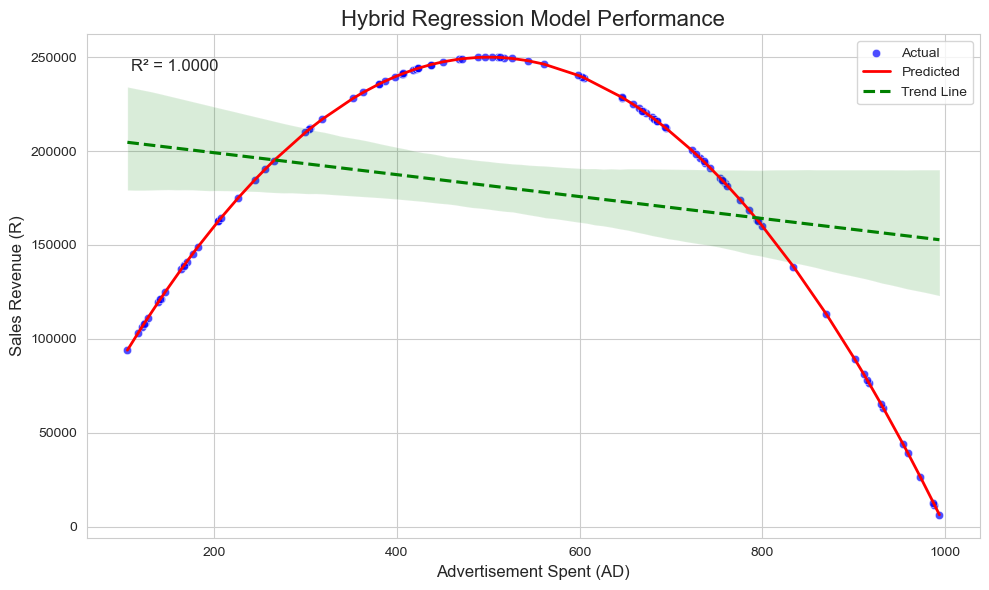

In [19]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# Prepare data for plotting
if isinstance(X_test, pd.DataFrame):
    X_test_plot = X_test.iloc[:, 0].values
elif hasattr(X_test, 'shape') and len(X_test.shape) > 1:
    X_test_plot = X_test.ravel()
else:
    X_test_plot = X_test

# Create a DataFrame for easy plotting with Seaborn
plot_df = pd.DataFrame({
    'Advertisement Spent': X_test_plot,
    'Actual Sales': y_test,
    'Predicted Sales': y_pred
})

# Plot actual data points
sns.scatterplot(x='Advertisement Spent', y='Actual Sales', data=plot_df, 
                label='Actual', color='blue', alpha=0.7)

# Plot predicted values
sns.lineplot(x='Advertisement Spent', y='Predicted Sales', data=plot_df, 
             label='Predicted', color='red', linewidth=2)

# Add regression line with confidence interval
sns.regplot(x='Advertisement Spent', y='Actual Sales', data=plot_df, 
            scatter=False, ci=95, line_kws={'color': 'green', 'linestyle': '--'}, 
            label='Trend Line')

# Calculate and display R² value
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
plt.text(0.05, 0.95, f'R² = {r2:.4f}', transform=plt.gca().transAxes, 
         fontsize=12, verticalalignment='top')

# Enhance the plot
plt.title('Hybrid Regression Model Performance', fontsize=16)
plt.xlabel('Advertisement Spent (AD)', fontsize=12)
plt.ylabel('Sales Revenue (R)', fontsize=12)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [21]:
#Train the model on the entire set before saving
final_model = LinearRegression()

final_model.fit(X,Y)

LinearRegression()

In [22]:
#saving the model

model_filename = 'final_hybrid_regression_model.joblib'
joblib.dump(final_model, model_filename)

print(f"\nModel saved as {model_filename}")


Model saved as final_hybrid_regression_model.joblib
